In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [16]:
# load dataset (note that dataset is seperated by ';' rather than usual ',')
# Set Date as index column and 
data = pd.read_csv('WindData.csv', sep = ';', index_col= 'Date', parse_dates=True, date_format="%d/%m/%Y %H:%M")
data


,Wind Production PZ_1,Wind Production PZ_2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,Station4_DD,...,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,"1396,847852","122,7055319","9,6",191,"6,1",179,7,224,"8,4",198,...,"12,4",199,"7,7",228,"6,1",195,"5,7",184,"10,2",202
2016-01-01 01:00:00,"1304,469541","105,1476672","9,8",188,"6,1",177,"6,6",227,"8,3",192,...,"13,2",197,"7,3",231,6,193,"5,3",185,"10,7",200
2016-01-01 02:00:00,"1201,416846","80,806082","9,9",188,"6,6",174,"6,3",231,"8,3",183,...,"13,4",197,"6,9",235,"6,3",193,"5,3",188,"10,4",199
2016-01-01 03:00:00,"1198,324268","67,63768345",10,187,"7,1",172,6,234,"8,4",173,...,"13,6",197,"6,6",239,"6,7",193,"5,2",191,"10,1",197
2016-01-01 04:00:00,"1113,926804","51,57622764","9,8",188,"7,5",172,"6,1",232,"8,5",171,...,13,202,"6,4",237,7,193,"4,8",195,"9,7",197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,"3049,62372","843,204789","12,7",250,"12,5",249,"13,1",244,"12,9",248,...,"14,5",255,"14,2",239,"12,1",251,"10,9",254,11,244
2016-12-31 20:00:00,"3045,754898","848,66082","12,7",250,"12,2",248,13,244,"12,7",247,...,"14,8",253,"14,1",240,12,250,"10,9",253,"11,4",245
2016-12-31 21:00:00,"3091,585559","845,4864019","12,8",249,12,247,13,244,"12,6",246,...,"15,2",252,"14,1",241,"11,9",248,11,252,"11,8",246


### Key points about the dataset
- Actual production for two regions (MW)  =  (Wind Production PZ_1, Wind Production PZ_2) columns
- forecasted wind speed (m/s) = WND columns
- forecasted wind direction (degrees) = DD columns


In [17]:
# check data types are correct
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Wind Production PZ_1  8784 non-null   object
 1   Wind Production PZ_2  8784 non-null   object
 2   Station1_WND          8784 non-null   object
 3   Station1_DD           8784 non-null   int64 
 4   Station2_WND          8784 non-null   object
 5   Station2_DD           8784 non-null   object
 6   Station3_WND          8784 non-null   object
 7   Station3_DD           8784 non-null   object
 8   Station4_WND          8784 non-null   object
 9   Station4_DD           8784 non-null   object
 10  Station5_WND          8784 non-null   object
 11  Station5_DD           8784 non-null   int64 
 12  Station6_WND          8784 non-null   object
 13  Station6_DD           8784 non-null   int64 
 14  Station7_WND          8784 non-null   object
 15  St

In [18]:
# convert columns to numeric data types

# commas causing a problem with Wind Production columns
data['Wind Production PZ_1'] = data['Wind Production PZ_1'].str.replace(',','.')
data['Wind Production PZ_1'] = pd.to_numeric(data['Wind Production PZ_1'],errors='coerce')
data['Wind Production PZ_2'] = data['Wind Production PZ_2'].str.replace(',','.')
data['Wind Production PZ_2'] = pd.to_numeric(data['Wind Production PZ_2'],errors='coerce')
for i in range(1,13):
    data[f'Station{i}_DD'] = pd.to_numeric(data[f'Station{i}_DD'],errors='coerce')
for i in range(1,13):
    data[f'Station{i}_WND'] = data[f'Station{i}_WND'].str.replace(',','.')
    data[f'Station{i}_WND'] = pd.to_numeric(data[f'Station{i}_WND'],errors='coerce')


In [19]:
# check for null values
data.isnull().sum()

Wind Production PZ_1    0
Wind Production PZ_2    0
Station1_WND            0
Station1_DD             0
Station2_WND            0
Station2_DD             1
Station3_WND            0
Station3_DD             1
Station4_WND            0
Station4_DD             1
Station5_WND            0
Station5_DD             0
Station6_WND            0
Station6_DD             0
Station7_WND            0
Station7_DD             1
Station8_WND            0
Station8_DD             1
Station9_WND            0
Station9_DD             0
Station10_WND           0
Station10_DD            0
Station11_WND           0
Station11_DD            0
Station12_WND           0
Station12_DD            0
dtype: int64

In [20]:
# number of null values low so drop rows containing null values
data = data.dropna()


Now data has been cleaned it is time to explore/visualise data

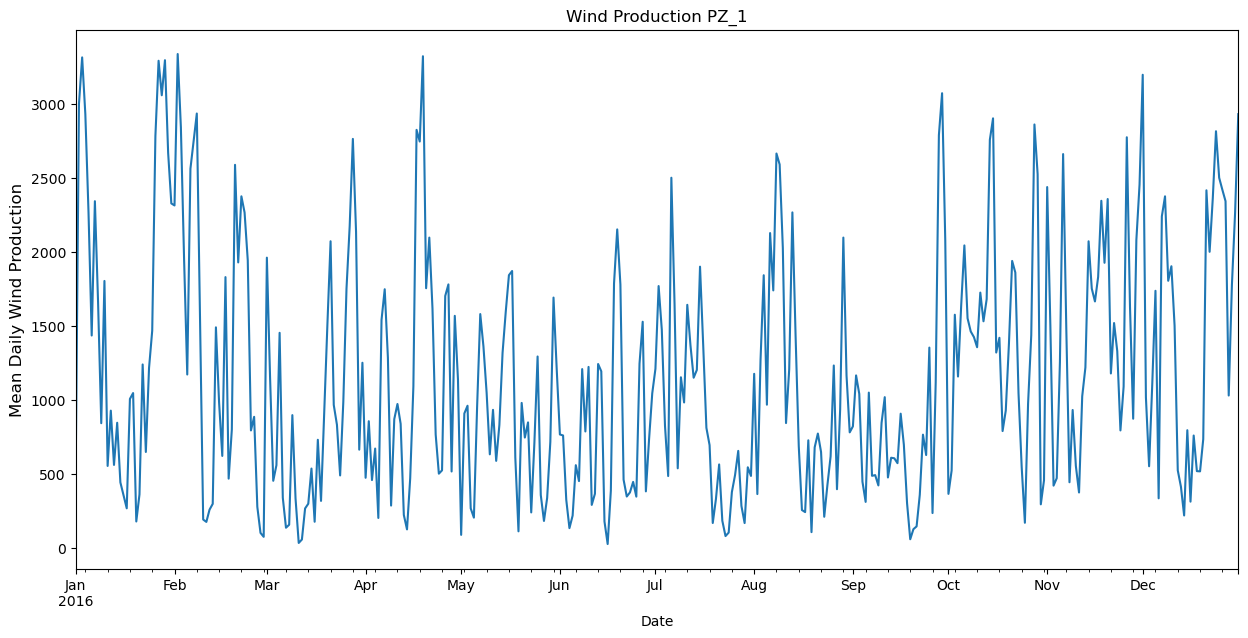

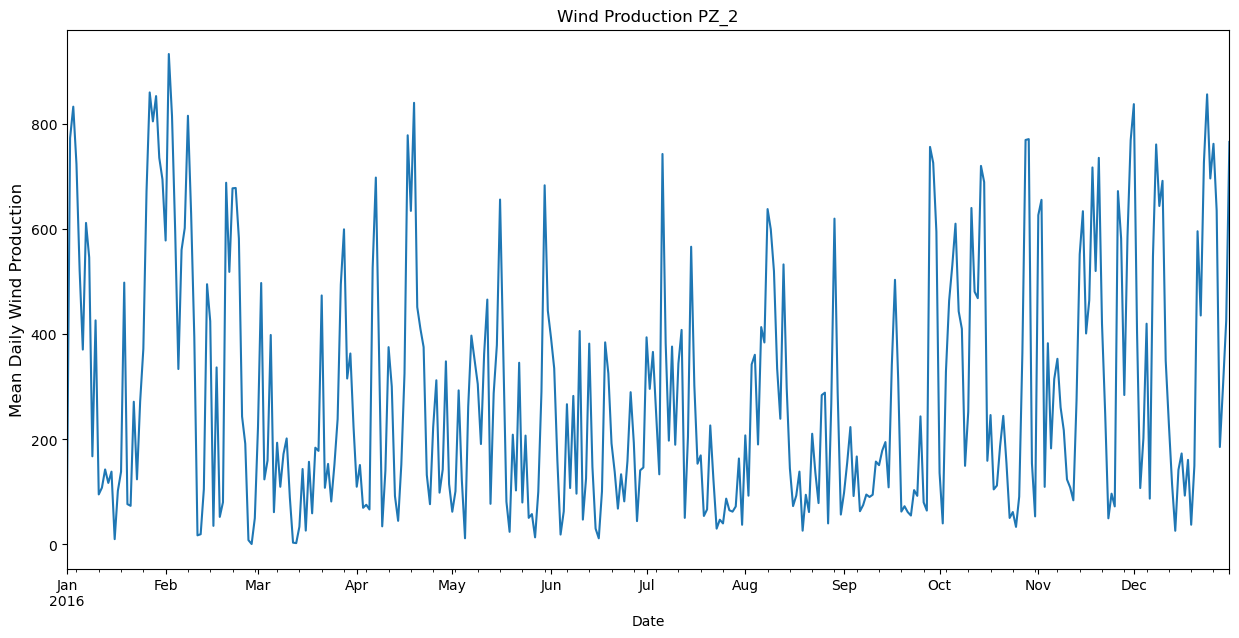

In [21]:
# Resampling daily 
plt.figure(figsize=(15,7))
plt.title('Wind Production PZ_1')
data['Wind Production PZ_1'].resample('D').mean().plot()
plt.ylabel('Mean Daily Wind Production', fontsize = 12)
plt.show()

plt.figure(figsize=(15,7))
plt.title('Wind Production PZ_2')
data['Wind Production PZ_2'].resample('D').mean().plot()
plt.ylabel('Mean Daily Wind Production', fontsize = 12)
plt.show()


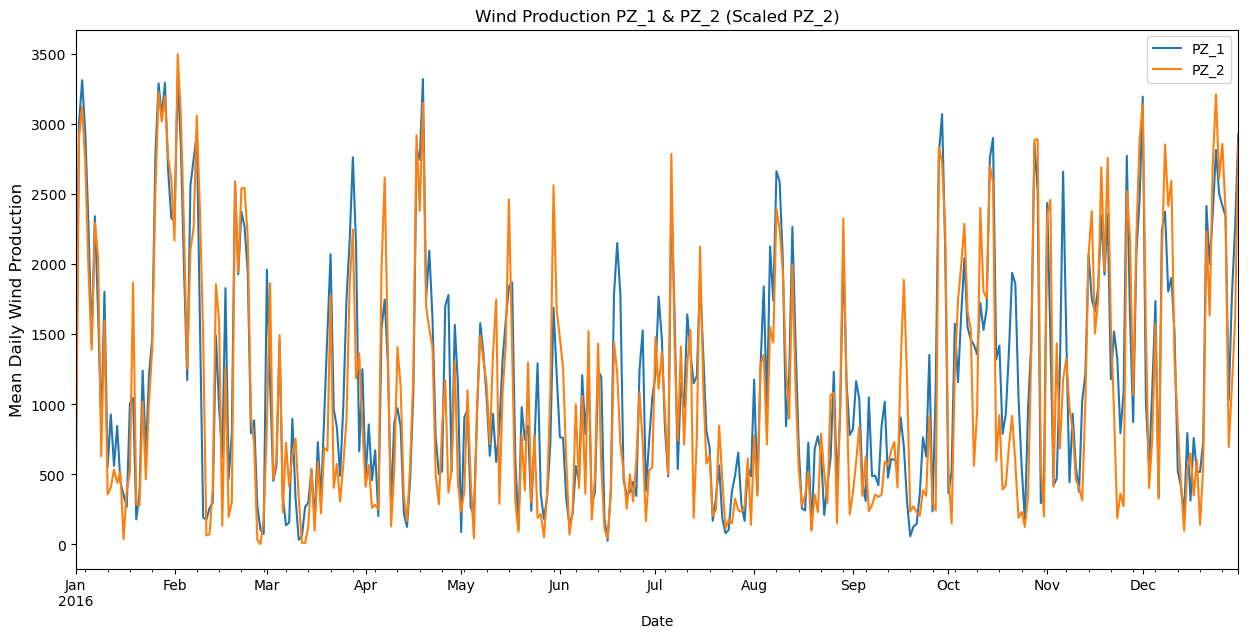

In [22]:
# plot combined with scaling
plt.figure(figsize=(15,7))
plt.title('Wind Production PZ_1 & PZ_2 (Scaled PZ_2)')
data['Wind Production PZ_1'].resample('D').mean().plot(label='PZ_1')
(data['Wind Production PZ_2']*3.75).resample('D').mean().plot(label='PZ_2')
plt.legend()
plt.ylabel('Mean Daily Wind Production', fontsize = 12)
plt.show()


It is worth noting that the wind production from the two zones follow a very similar trend up to scaling.

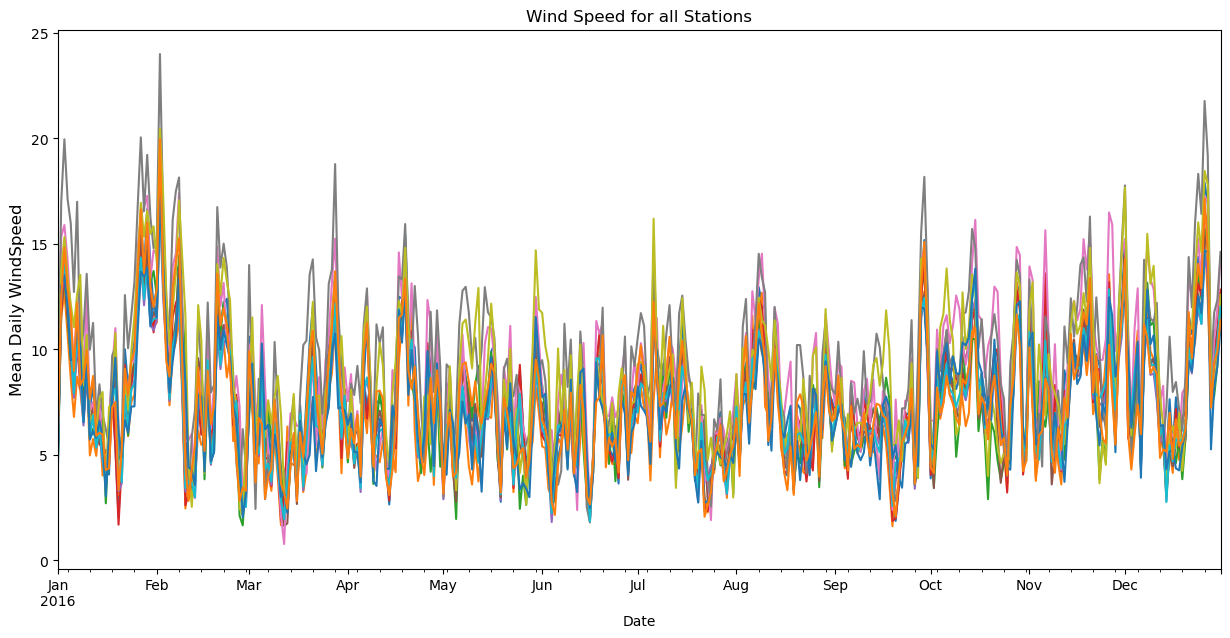

In [23]:
# plot speed for all stations
plt.figure(figsize=(15,7))
plt.title('Wind Speed for all Stations')
for i in range(1,13):
    data[f'Station{i}_WND'].resample('D').mean().plot()
plt.ylabel('Mean Daily WindSpeed', fontsize = 12)
plt.show()

In [ ]:
# plot speed for all stations
for i in range(1,13):
    plt.figure(figsize=(15,7))
    plt.title('Wind Speed for all Stations')
    data[f'Station{i}_WND'].resample('D').mean().plot()
    plt.ylabel('Mean Daily WindSpeed', fontsize = 12)
    plt.show()


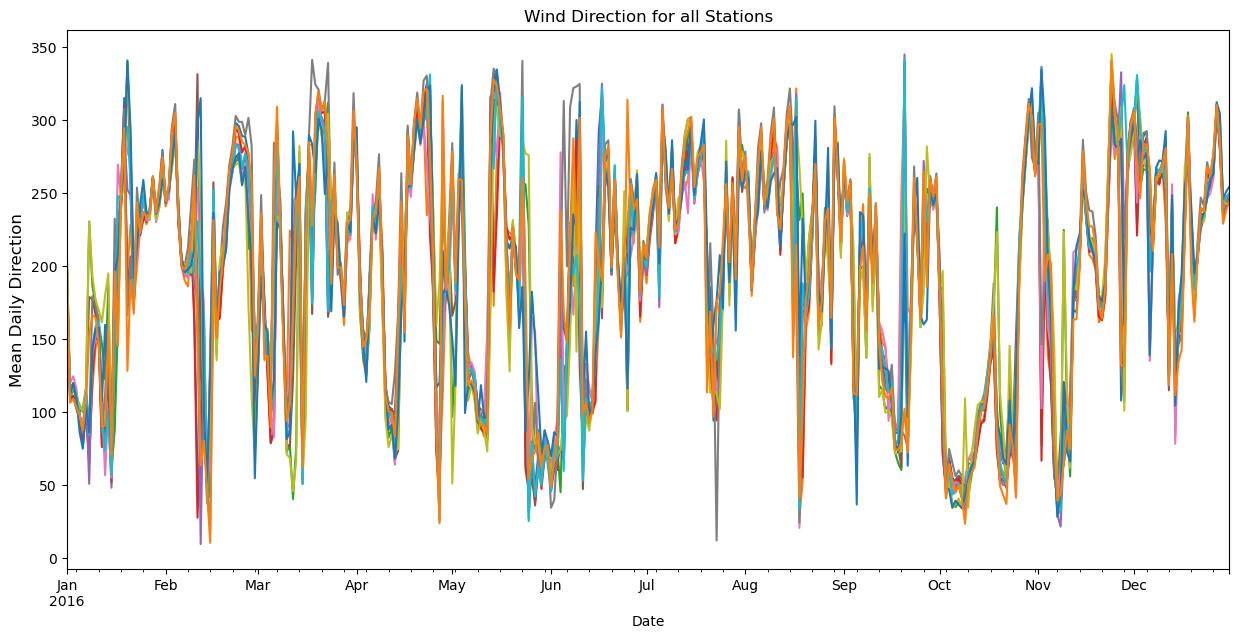

In [25]:
# plot direction for all stations
plt.figure(figsize=(15,7))
plt.title('Wind Direction for all Stations')
for i in range(1,13):
    data[f'Station{i}_DD'].resample('D').mean().plot()
plt.ylabel('Mean Daily Direction', fontsize = 12)
plt.show()

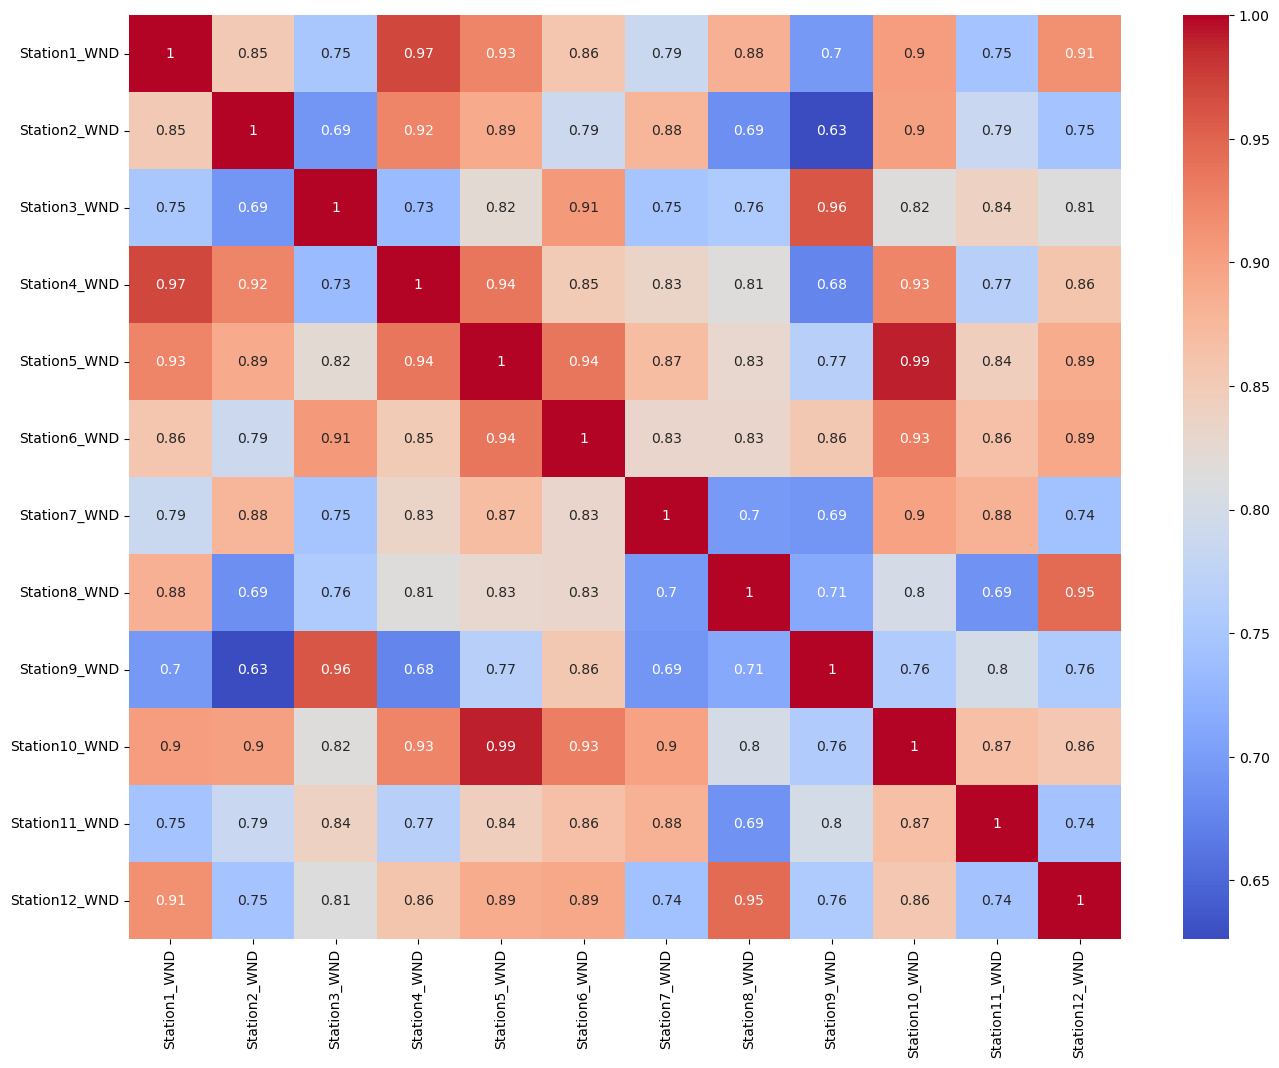

In [26]:
# Visualise correlation matrix
correlations = data[['Station1_WND','Station2_WND','Station3_WND','Station4_WND',
                     'Station5_WND','Station6_WND','Station7_WND','Station8_WND',
                     'Station9_WND','Station10_WND','Station11_WND','Station12_WND']].corr(method='pearson')
plt.figure(figsize = (16,12))
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

### Create the model to predict wind production in region 2

In [27]:
# set features to x and target column to y
x = data.drop(['Wind Production PZ_1','Wind Production PZ_2'], axis=1)
y = data['Wind Production PZ_2']

# split into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(
    x,y,test_size=0.2, shuffle=False
    )

model = RandomForestRegressor()
model.fit(xtrain,ytrain)


RandomForestRegressor()

In [28]:
predict_train = model.predict(xtrain)
predict_test = model.predict(xtest)

rmse = mean_squared_error(ytrain, predict_train, squared=False)
r2 = r2_score(ytrain, predict_train)
print("---Train Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

mae = mean_absolute_error(ytest, predict_test)
rmse = mean_squared_error(ytest, predict_test, squared=False)
r2 = r2_score(ytest, predict_test)
print("---Test Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

---Train Data---
Root Mean Squared Error: 17.226190552220224
R-squared: 0.9950854134814414
---Test Data---
Root Mean Squared Error: 77.1662550129044
R-squared: 0.9276986509387602


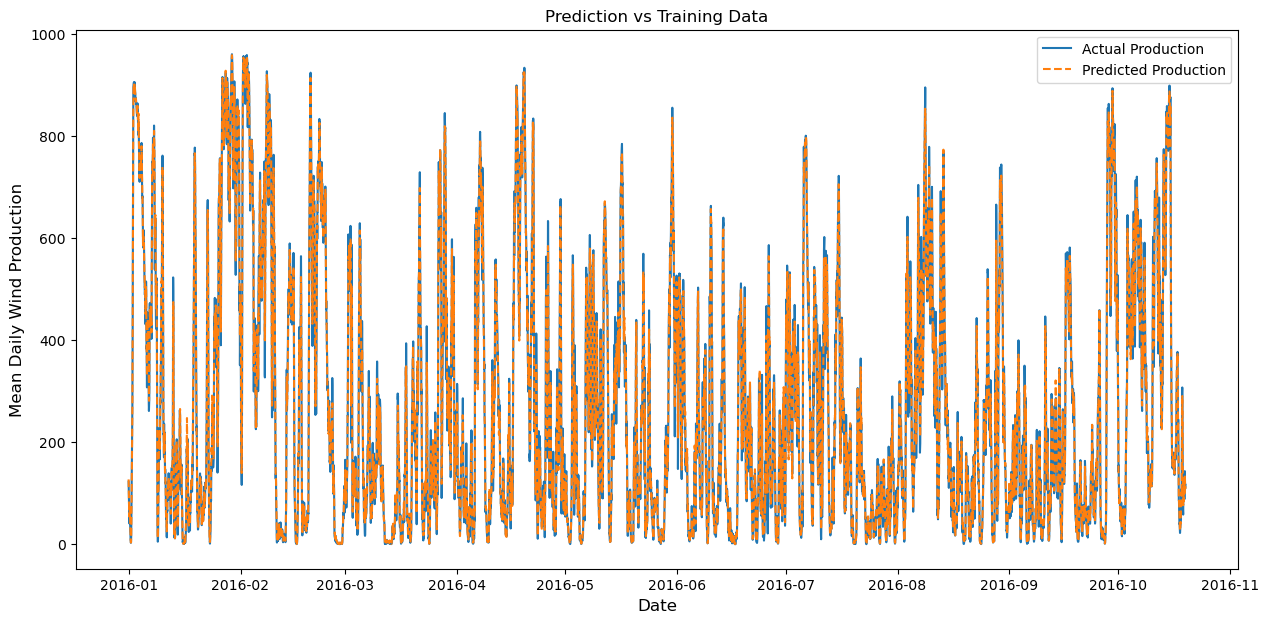

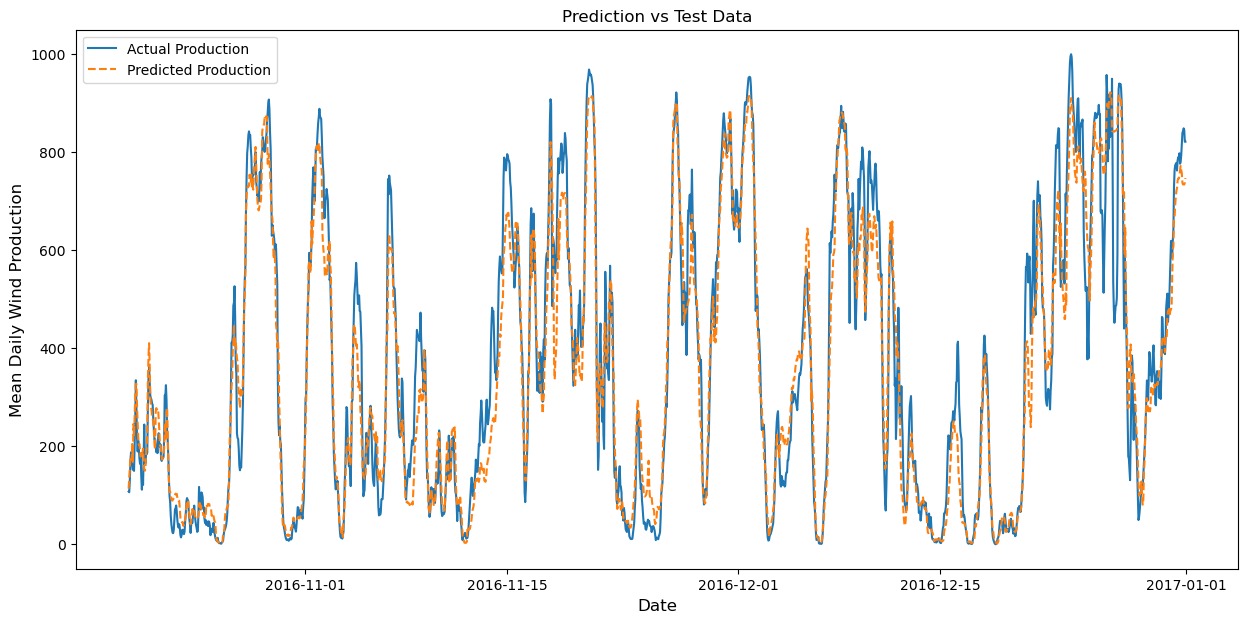

In [29]:
# Plot comparison between the predictions in training and testing
plt.figure(figsize=(15,7))
plt.title('Prediction vs Training Data')
plt.plot(ytrain,label='Actual Production')
plt.plot(ytrain.index, predict_train, label= 'Predicted Production', linestyle = 'dashed')
plt.ylabel('Mean Daily Wind Production', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
plt.title('Prediction vs Test Data')
plt.plot(ytest,label='Actual Production')
plt.plot(ytest.index, predict_test, label= 'Predicted Production', linestyle = 'dashed')
plt.ylabel('Mean Daily Wind Production', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.show()


Now Try to improve the Random Forest Regressor Model

In [30]:
# try changing random_state

model = RandomForestRegressor(n_estimators=25, random_state=160, max_depth=None)
model.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=25, random_state=160)

In [31]:
predict_train = model.predict(xtrain)
predict_test = model.predict(xtest)

rmse = mean_squared_error(ytrain, predict_train, squared=False)
r2 = r2_score(ytrain, predict_train)
print("---Train Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

rmse = mean_squared_error(ytest, predict_test, squared=False)
r2 = r2_score(ytest, predict_test)
print("---Test Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

---Train Data---
Root Mean Squared Error: 18.601313669935557
R-squared: 0.9942694576884307
---Test Data---
Root Mean Squared Error: 77.92308762867594
R-squared: 0.9262734590299424


### Model with tuned hyperparameters

In [32]:
# split into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(
    x,y,test_size=0.2, shuffle=True
    )

model = RandomForestRegressor(n_estimators=100, random_state=200, max_depth=None)
model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=200)

In [33]:
predict_train = model.predict(xtrain)
predict_test = model.predict(xtest)

rmse = mean_squared_error(ytrain, predict_train, squared=False)
r2 = r2_score(ytrain, predict_train)
print("---Train Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

rmse = mean_squared_error(ytest, predict_test, squared=False)
r2 = r2_score(ytest, predict_test)
print("---Test Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

---Train Data---
Root Mean Squared Error: 18.650326145471748
R-squared: 0.9947258718681692
---Test Data---
Root Mean Squared Error: 48.88064092205722
R-squared: 0.964947577904118


### Moving Average Model

In [34]:
# Define window size for moving average algorithm
data.loc[:, 'PZ_2 Forecast'] = data['Wind Production PZ_2'].rolling(window=7, min_periods=1).mean()
data

C:\Users\cnata\AppData\Local\Temp\ipykernel_15008\3594161503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'PZ_2 Forecast'] = data['Wind Production PZ_2'].rolling(window=7, min_periods=1).mean()


,Wind Production PZ_1,Wind Production PZ_2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,Station4_DD,...,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD,PZ_2 Forecast
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1396.847852,122.705532,9.6,191,6.1,179.0,7.0,224.0,8.4,198.0,...,199.0,7.7,228,6.1,195,5.7,184,10.2,202,122.705532
2016-01-01 01:00:00,1304.469541,105.147667,9.8,188,6.1,177.0,6.6,227.0,8.3,192.0,...,197.0,7.3,231,6.0,193,5.3,185,10.7,200,113.926600
2016-01-01 02:00:00,1201.416846,80.806082,9.9,188,6.6,174.0,6.3,231.0,8.3,183.0,...,197.0,6.9,235,6.3,193,5.3,188,10.4,199,102.886427
2016-01-01 03:00:00,1198.324268,67.637683,10.0,187,7.1,172.0,6.0,234.0,8.4,173.0,...,197.0,6.6,239,6.7,193,5.2,191,10.1,197,94.074241
2016-01-01 04:00:00,1113.926804,51.576228,9.8,188,7.5,172.0,6.1,232.0,8.5,171.0,...,202.0,6.4,237,7.0,193,4.8,195,9.7,197,85.574638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,3049.623720,843.204789,12.7,250,12.5,249.0,13.1,244.0,12.9,248.0,...,255.0,14.2,239,12.1,251,10.9,254,11.0,244,806.486409
2016-12-31 20:00:00,3045.754898,848.660820,12.7,250,12.2,248.0,13.0,244.0,12.7,247.0,...,253.0,14.1,240,12.0,250,10.9,253,11.4,245,813.756393
2016-12-31 21:00:00,3091.585559,845.486402,12.8,249,12.0,247.0,13.0,244.0,12.6,246.0,...,252.0,14.1,241,11.9,248,11.0,252,11.8,246,823.619763


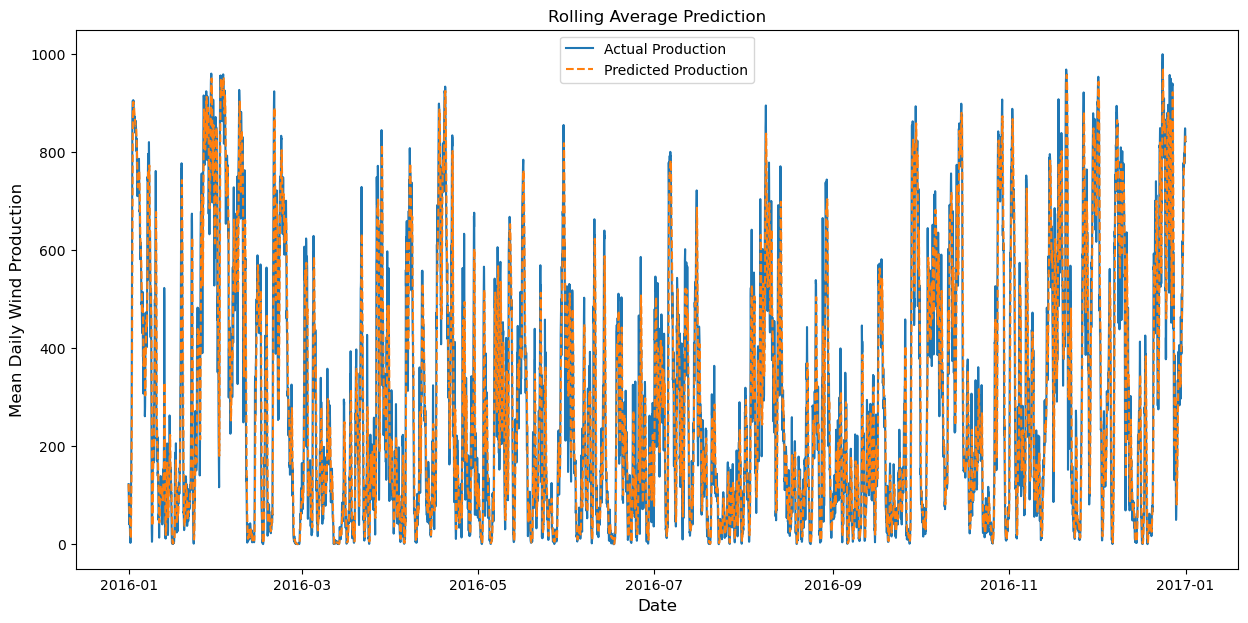

In [35]:
# Plot rolling average model
plt.figure(figsize=(15,7))
plt.title('Rolling Average Prediction')
plt.plot(data['Wind Production PZ_2'],label='Actual Production')
plt.plot(data['PZ_2 Forecast'], label= 'Predicted Production', linestyle = 'dashed')
plt.ylabel('Mean Daily Wind Production', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend()
plt.show()

In [36]:
rmse = mean_squared_error(data['Wind Production PZ_2'], data['PZ_2 Forecast'], squared=False)
r2 = r2_score(data['Wind Production PZ_2'], data['PZ_2 Forecast'])
print("---Moving Average---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

---Moving Average---
Root Mean Squared Error: 79.06119667931029
R-squared: 0.9058583917193903


### Now for Wind Production PZ_1

In [40]:
# set features to x and target column to y
x1 = data.drop(['Wind Production PZ_1','Wind Production PZ_2'], axis=1)
y1 = data['Wind Production PZ_1']

# split into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(
    x1,y1,test_size=0.2, shuffle=True
    )

model = RandomForestRegressor(n_estimators=100, random_state=200, max_depth=None)
model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=200)

In [41]:
predict_train = model.predict(xtrain)
predict_test = model.predict(xtest)

rmse = mean_squared_error(ytrain, predict_train, squared=False)
r2 = r2_score(ytrain, predict_train)
print("---Train Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

rmse = mean_squared_error(ytest, predict_test, squared=False)
r2 = r2_score(ytest, predict_test)
print("---Test Data---")
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

---Train Data---
Root Mean Squared Error: 52.99979357341378
R-squared: 0.9966044662390531
---Test Data---
Root Mean Squared Error: 132.00027547323234
R-squared: 0.9787413689178399
